# Cleaning and EDA:

I'll start off by doing some cleaning to our data set and fixing any data type issues we may have. Then I'll conduct some exploratory data analysis to find trends/patterns in the data

In [1]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.preprocessing import StandardScaler


#options

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
pd.set_option('chained_assignment', None)


In [2]:
#read in train data
train = pd.read_csv('./datasets/train.csv')
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
#checking for null values

#thanks to Chanakya Vivek Kapoor on Kaggle for this solution 

def null_values(df):
    
    columns = df.isnull().sum().index
    values = df.isnull().sum().values
    null_percentage = []
    
    #finding null values in each column, dividing by shape of the data frame and multiplying by 100
    [null_percentage.append((df[column]).isnull().sum()/ df[column].shape[0] * 100) for column in columns]
    
    null_dict = {'Columns':columns, 'Null Values': values, 'Percentage of Null Values': null_percentage}
    
    null_table = pd.DataFrame(data = null_dict)
    
    return null_table

In [4]:
null_table = null_values(train)
null_table.sort_values(by = 'Percentage of Null Values', ascending = False).head()

,Columns,Null Values,Percentage of Null Values
73,Pool QC,2042,99.561190
75,Misc Feature,1986,96.830814
7,Alley,1911,93.174061
74,Fence,1651,80.497318
58,Fireplace Qu,1000,48.756704


In [5]:
def df(dataset):
    #remove columns with more than 90% of null values.
    train_data = dataset.loc[:, dataset.isin([np.nan]).mean() < .90]
    
    #fill in null values for columns with missing data that I want to keep
    train_data.fillna({'Fireplace Qu': 'NA', 'Fence': 'NA', 'Lot Frontage': 0}, inplace = True)
    
    #remaping ordinal columns to numerical values
    train_data['Exter Qual'] = train_data['Exter Qual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
    train_data['Exter Cond'] = train_data['Exter Cond'].map({'Ex':5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po':1})
    train_data['Bsmt Qual']= train_data['Bsmt Qual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA': 0})
    train_data['Bsmt Cond'] = train_data['Bsmt Cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po':1, 'NA': 0})
    train_data['Bsmt Exposure'] = train_data['Bsmt Exposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No':1, 'NA': 0})
    train_data['BsmtFin Type 1'] = train_data['BsmtFin Type 1'].map({'GLQ': 6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})
    train_data['BsmtFin Type 2'] = train_data['BsmtFin Type 2'].map({'GLQ': 6, 'ALQ':5, 'BLQ': 4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})
    train_data['Heating QC'] = train_data['Heating QC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1})
    train_data['Electrical'] = train_data['Electrical'].map({'SBrkr':4, 'FuseA':3, "FuseF":2, 'FuseP':1, 'Mix':0})
    train_data['Kitchen Qual']= train_data['Kitchen Qual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
    train_data['Functional']= train_data['Functional'].map({'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0 })
    train_data['Fireplace Qu'] = train_data['Fireplace Qu'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})
    train_data['Garage Finish'] = train_data['Garage Finish'].map({'Fin':3, 'RFn':2, 'Unf':1, 'NA':0 })
    train_data['Garage Qual'] = train_data['Garage Qual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})
    train_data['Garage Cond']= train_data['Garage Cond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})
    train_data['Paved Drive']= train_data['Paved Drive'].map({'Y':3, 'P':2, 'N':1})
    train_data['Fence']= train_data['Fence'].map({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0})
    
    #changing numeric data types to strings(object)
    train_data['Mo Sold'] = train_data['Mo Sold'].astype(str)
    train_data['Yr Sold'] = train_data['Yr Sold'].astype(str)
    train_data['MS SubClass'] = train_data['MS SubClass'].astype(str)
    #
#     #dummify left over categorical data columns
#     train_data = pd.get_dummies(data = train_data, columns = list(train_data.select_dtypes(['object']).columns), drop_first=True)
    
    #drop rest of null values less than 90%
    train_data.dropna(inplace=True)
    
    return train_data

## Dealing with missing values:

From our results above, 5 of our columns have about or over 50% of it's data missing.

It's important to note that a column having null values could mean that data was not recorded or does not exist(ie: NA in the 'Pool QC' column means the property has no pool) so it can still be valuable information.

For the purposes of this regression model, I will get rid of columns that contain more than 90% of null data which will be the **'Pool QC', 'Alley' and 'Misc Feature' columns**. It would mean that data is truly missing or these properties do not contain a misc feature, a pool or an alley which is not helping much from an analysis point of view.

## Ordinal and Nominal data:
Some of our data contains values that are ordinal, meaning that the values have some intrinsic order. This means they can be ranked from best to worst or numerically (from 1-5 for example). Converting our ordinal data columns would be best in order to assess their impact on the model I will create.
Nominal values have no intrinsic order and are typically descriptive. We will convert these to dummy columns later on.

## Data types:
In addition to changing our ordinal data to numeric columns, I've also changed some of our numeric columns to strings. **'Mo Sold', 'Year Sold', and 'MS Subclass'** are currently numeric but should be more of a string as they are descriptive. Our model might confuse the values and assume a higher value should be weighted more.  

In [6]:
train_data = df(train)
train_data.head(5)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,0.0,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3.0,3.0,1.0,6.0,533.0,1.0,0.0,192.0,725.0,GasA,5,Y,4,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,7,0,0,Attchd,1976.0,2.0,2.0,475.0,3.0,3.0,3,0,44,0,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4.0,3.0,1.0,6.0,637.0,1.0,0.0,276.0,913.0,GasA,5,Y,4,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,7,1,3,Attchd,1997.0,2.0,2.0,559.0,3.0,3.0,3,0,74,0,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3.0,3.0,1.0,6.0,731.0,1.0,0.0,326.0,1057.0,GasA,3,Y,4,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,7,0,0,Detchd,1953.0,1.0,1.0,246.0,3.0,3.0,3,0,52,0,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4.0,3.0,1.0,1.0,0.0,1.0,0.0,384.0,384.0,GasA,4,Y,4,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,7,0,0,BuiltIn,2007.0,3.0,2.0,400.0,3.0,3.0,3,100,0,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2.0,4.0,1.0,1.0,0.0,1.0,0.0,676.0,676.0,GasA,3,Y,4,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,7,0,0,Detchd,1957.0,1.0,2.0,484.0,3.0,3.0,1,0,59,0,0,0,0,0,0,3,2010,WD,138500


In [7]:
train_data.shape

(1866, 78)

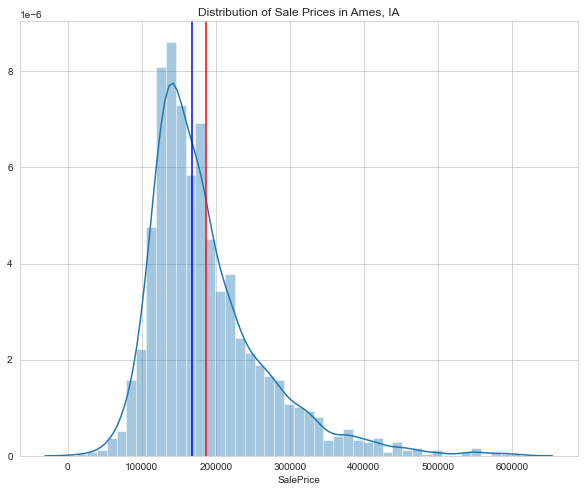

In [8]:
#checking distribution of our Sale Price data
plt.figure(figsize=(10,8))
sns.distplot(train_data.loc[:, 'SalePrice'], norm_hist = True,)
plt.axvline(x = train_data['SalePrice'].mean(), c = 'red')
plt.axvline(x = train_data['SalePrice'].median(), c = 'blue')
plt.title('Distribution of Sale Prices in Ames, IA');

## Distribution of Sale Price
Our housing price data seems to be slightly right skewed to normal but not exactly a bell shaped curve, meaning that our mean(red line) is higher than the median(blue line). This could be because we have homes that tend to be higher priced thereby offsetting our data. We will need to correct for outliers in order to normalize our data.

To fix this issue, I'll apply a log transformation to the Sale Price data and correct the skew.

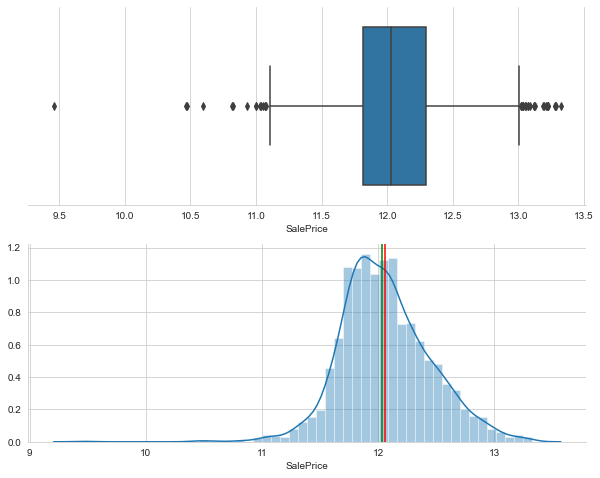

In [9]:
x = np.log1p(train_data['SalePrice'])
f, (ax_box, ax_hist) = plt.subplots(2, figsize=(10,8))

sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)
plt.axvline(x = x.mean(), c = 'red')
plt.axvline(x = x.median(), c = 'green')

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.show()

My data is now more left skewed as it has a longer left tail but the still follows a normal distribution. This could be because we have a larger mean value. Nonetheless our Sale Price has now been normalized by performing a log transformation. 

## Checking for multicolinearity and correlation to sale price

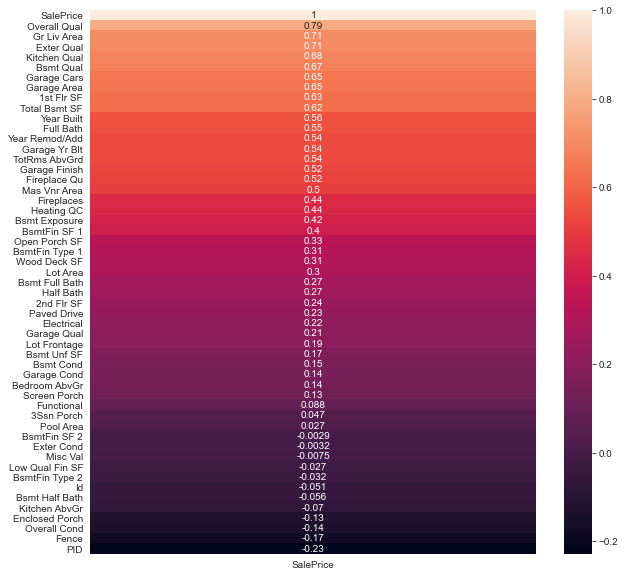

In [10]:
corr = train_data.corr()['SalePrice'].sort_values(ascending = False).to_frame()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True,linecolor='black');

According to the heatmap, the top 5 values most correlated with price are as follows:
- Overall Qual
- Gr Liv Area
- Exter Qual
- Kitchen Qual
- Bsmt Qual

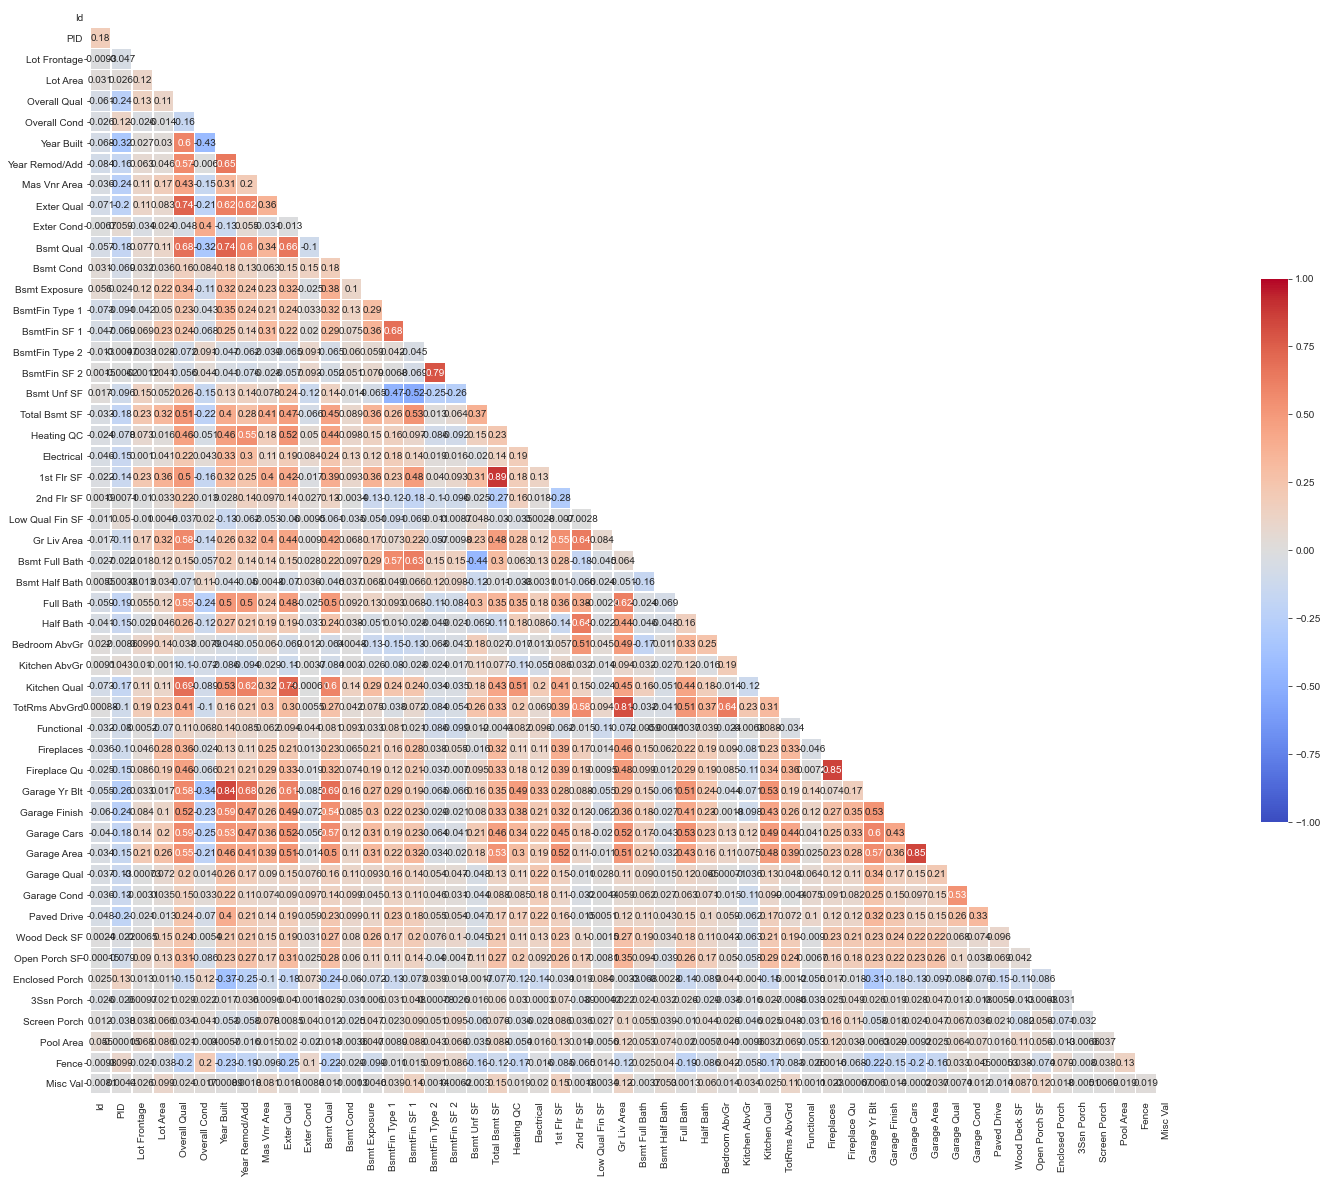

In [25]:
# searching for multicolinarity in each numerical variable

#Tweaking diagonal correlation example from seaborn.pydata.org

#correlation dataframe of independent variables only
new_corr = train_data.drop(columns='SalePrice')
corr = new_corr.corr()
#generate mask for uper triangle
masked_corr = np.triu(np.ones_like(corr, dtype = bool))
#mtplotlib figure
fig, ax = plt.subplots(figsize = (30,20))
#color map
cmap = sns.diverging_palette(230, 30, as_cmap=True)

#draw heatmap
sns.heatmap(corr,mask= masked_corr, vmin= -1,vmax= 1, center= 0, annot=True, cmap= 'coolwarm',
           square= True, linewidths= .5, cbar_kws={"shrink": .5}); 

As we can see from our heat map, a few of our independent variables seem to be highly correlated with each other. Let's take a closer look at some of those variables

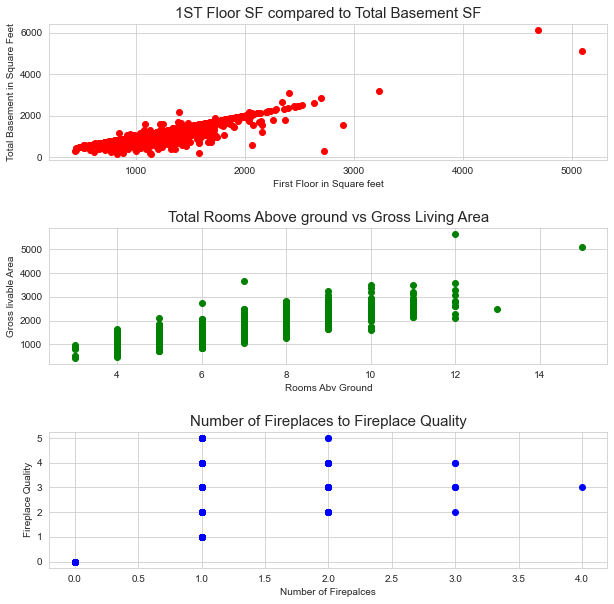

In [63]:
fig, axs = plt.subplots(3,figsize = (10,10))
fig.subplots_adjust(hspace = 0.5)
axs[0].scatter(x = train_data['1st Flr SF'], y = train_data['Total Bsmt SF'], c = 'red')
axs[0].set_title('Total Basement SF vs 1st Floor SFb', fontsize= 15)
axs[0].set_xlabel("First Floor in Square feet")
axs[0].set_ylabel('Total Basement in Square Feet')

axs[1].scatter(x = train_data['TotRms AbvGrd'], y = train_data['Gr Liv Area'], c = 'green')
axs[1].set_title('Total Rooms Above ground vs Gross Living Area', fontsize = 15)
axs[1].set_xlabel("Rooms Abv Ground")
axs[1].set_ylabel('Gross livable Area')

axs[2].scatter(x = train_data['Fireplaces'], y = train_data['Fireplace Qu'], color = 'blue')
axs[2].set_title('Number of Fireplaces to Fireplace Quality', fontsize = 15)
axs[2].set_xlabel("Number of Firepalces")
axs[2].set_ylabel('Fireplace Quality');

With the exception of a few outliers, these variables are highly correlated to each other. As one variable goes up, so does the other.

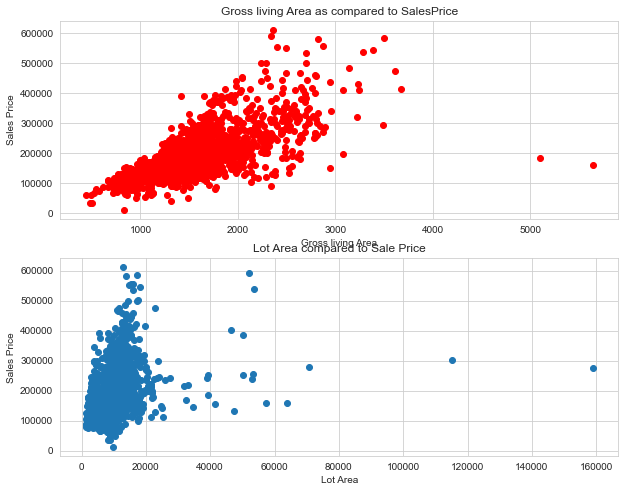

In [11]:

fig, axs = plt.subplots(2,figsize = (10,8))
axs[0].scatter(x = train_data['Gr Liv Area'], y = train_data['SalePrice'], c = 'red')
axs[0].set_title('Gross living Area as compared to SalesPrice')
axs[0].set_xlabel("Gross living Area")
axs[0].set_ylabel('Sales Price')

axs[1].scatter(x = train_data['Lot Area'], y = train_data['SalePrice'])
axs[1].set_title('Lot Area compared to Sale Price')
axs[1].set_xlabel('Lot Area')
axs[1].set_ylabel('Sales Price');